<h3>Problem description</h3>

For this final project, I am going to develop a machine learning model that predicts if a tumor is benign or malignant, based on the Sklearn Breast Cancer Wisconsin (Diagnostic) Dataset. The features in this dataset were calculated from digitized images of fine needle aspirate samples of breat mass tissue and was curated by Dr. William H. Wolberg, W. Nick Street, and Olvi L. Mangasarian. [1]

The dataset consists of 569 observations, 30 features and one target variable, which identifies an observation as malignant (1) or benign (0). We can see below that all data is numerical (float) and the dataset does not contain na-values.

<h3>Features</h3>

For each of the ten characteristics the dataset contains the mean, the standard error, and the largest value ("worst"). The characteristics described for each cell nucleus are:  
<ul>
<li>Radius (Distance of the perimeter points to the center)</li>
<li>Texture (Standard deviation of gray-scale values)</li>
<li>Perimeter</li>
<li>Area</li>
<li>Smoothness (variations in radius lengths)</li>
<li>Compactness (Perimeter^2/area-1)</li>
<li>Concavity (Severity of concave portions of the contour)</li>
<li>Concave points (Number of concave areas of the contour)</li>
<li>Symmetry </li>
<li>Fractal dimension </li>
</ul>

<h3>EDA</h3>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib as mpl
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from supertree import SuperTree
import matplotlib.pyplot as plt

In [2]:
# Load breast cancer dataset from sklearn
data = load_breast_cancer()

# Convert the dataset to a pandas DataFrame
df_x = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the DataFrame
df_y = data.target

In [3]:
pd.set_option("display.max.columns", None)
df_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_x.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

<h3>Analysis</h3>

In the following section I am training several different models: Adaboost with decision tree stumps, adaboost with support vector classifier, support vector classifier, and random forest classifier.

In [5]:
#splitting dataset in train and test data
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=23)

<h5>Adaboost with Decision Tree Stumps</h5>

In [6]:
ada_stump = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth=1), n_estimators=100)
ada_stump.fit(X_train, y_train)
#print(ada_stump.score(X_test, y_test))
cv_train = cross_val_score(ada_stump, X_train, y_train, cv=10)
cv_test = cross_val_score(ada_stump, X_test, y_test, cv=10)
print("Mean cross-validation score for training data: " + str(round(np.mean(cv_train),2)))
print("Mean cross-validation score for test data: " + str(round(np.mean(cv_test),2)))

Mean cross-validation score for training data: 0.97
Mean cross-validation score for test data: 0.94


<h5>Support Vector Classifier</h5>

In [7]:
#Using GridSearch to find the best parameters C and gamma
param_grid = {'C': [0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100, 500, 1000], 
			'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
			'kernel': ['rbf']} 

In [8]:
%%capture

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
grid.fit(X_train, y_train)

In [9]:
#printing best estimators found
print(grid.best_estimator_)

SVC(C=5, gamma=0.0001)


In [10]:
#Training a Support Vector Classifier with the best estimators
svc = SVC(C=5, gamma=0.0001)
svc.fit(X_train, y_train)
#print(svc.score(X_test, y_test))
cv_train = cross_val_score(svc, X_train, y_train, cv=10)
cv_test = cross_val_score(svc, X_test, y_test, cv=10)
print("Mean cross-validation score for training data: " + str(round(np.mean(cv_train),2)))
print("Mean cross-validation score for test data: " + str(round(np.mean(cv_test),2)))

Mean cross-validation score for training data: 0.94
Mean cross-validation score for test data: 0.93


<h5>Adaboost with Linear Support Vector Classifier</h5>

In [11]:
#adaboost seems to be inadequate for the given data
ada_svc = AdaBoostClassifier(estimator = SVC(kernel='linear'), n_estimators=100)
ada_svc.fit(X_train, y_train)
#print(ada_svc.score(X_test, y_test))
cv_train = cross_val_score(ada_svc, X_train, y_train, cv=10)
cv_test = cross_val_score(ada_svc, X_test, y_test, cv=10)
print("Mean cross-validation score for training data: " + str(round(np.mean(cv_train),2)))
print("Mean cross-validation score for test data: " + str(round(np.mean(cv_test),2)))

Mean cross-validation score for training data: 0.94
Mean cross-validation score for test data: 0.93


<h5>Random Forest Classifier</h5>

In [12]:
#code here
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)
cv_train = cross_val_score(forest, X_train, y_train, cv=10)
cv_test = cross_val_score(forest, X_test, y_test, cv=10)
print("Mean cross-validation score for training data: " + str(round(np.mean(cv_train),2)))
print("Mean cross-validation score for test data: " + str(round(np.mean(cv_test),2)))

Mean cross-validation score for training data: 0.95
Mean cross-validation score for test data: 0.96


<h3>Result</h3>

The best performing classifier is the random forest classifier, with a train and test accuracy varying between .95 and .96.

See below the feature importance for the trained Random Forest Classifier, as well as an interactive visualization of one of the trees.

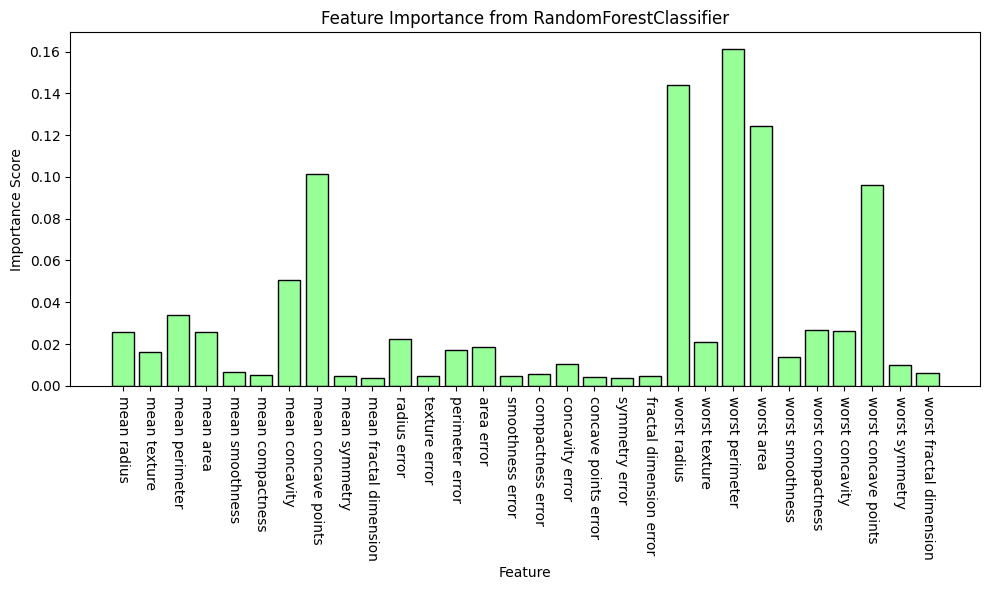

In [13]:
# Step 4: Extract feature importances
fi = forest.feature_importances_
plt_labels = ['mean radius','mean texture','mean perimeter','mean area','mean smoothness','mean compactness','mean concavity',
              'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error',
              'area error','smoothness error','compactness error', 'concavity error', 'concave points error', 'symmetry error',
              'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 
              'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
# Step 5: Visualize feature importances
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(df_x.shape[1]), fi, color='#98FF98', edgecolor='black')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance from RandomForestClassifier')
plt.xticks(range(df_x.shape[1]), plt_labels, rotation=-90)
plt.tight_layout()
plt.show()

<h5>A Decision Tree</h5>

In this visualization you see one of the decision trees in our forest. You can zoom around, change the depth that is being shown, and collapse the nodes by clicking on them. 

In [14]:
st = SuperTree(
    forest, 
    X_train, 
    y_train, 
    data.feature_names, 
    data.target_names
)

st.show_tree(which_tree=3)

<h3>Conclusion</h3>

In this project I attempted to develop a supervised learning algorith that best distinguishes between malignant and non-malignant cells from breast mass tissue based on 30 features. 

We can see that support vector classifier, Adaboost with linear support vector classifier, and random forest classifier all perform relatively well. The final model is a random forest classifier which reaches a test accuracy of around 0.96. 

When we examine the feature importance, we can see that some factors, like worst concave points, worst radius, worst area and worst perimeter are much more influential than some other features. By eliminating features of less influence from the model, the accuracy could probably be boosted a little more. 

The results achieved in this final project suggest that machine learning models can be a great asset in medical care. 

<h3>Quotations</h3>

1. https://www.geeksforgeeks.org/machine-learning/breast-cancer-wisconsin-diagnostic-dataset/ (09/26/2025)

<h3>GitHub Repository</h3>

https://github.com/TayaPrince/ml-supervised-final/blob/main/MachineLearning_Supervised_Final.ipynb